# Title: Build the Image classification model
Aim: Build the Image classification model by dividing the model into following 4 stages:
a)Loading and pre-processing the image data
b)Defining the model’s architecture
c)Training the model
d)Estimating the model’s performance

In [1]:
#importing required packages
import tensorflow as tf   ## to create our neural n/w
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D   # dropout-to remove the random neurons #flatten-toconvert input into vector or 1-d input
import matplotlib.pyplot as plt  #plotting
import numpy as np  #used to show our predicted class

In [4]:
#a) Loading and preprocessing the image data

mnist = tf.keras.datasets.mnist   #importing MNIST dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()  #spliting the training and testing datasets
input_shape=(28,28,1)


#Making the values to the decimal points after division
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)


x_train=x_train.astype('float32')  # converting datatype to float
x_test=x_test.astype('float32')

#normalizing the rgd codes by diviidng it to the max RGB value
x_train=x_train / 255
x_test=x_test / 255

print("Shape of traning :",x_train.shape)
print("Shape of testing :",x_test.shape)

Shape of traning : (60000, 28, 28, 1)
Shape of testing : (10000, 28, 28, 1)


In [5]:
#b) Defining the model’s architecture

model = Sequential() 
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))  # adding convolution layer  ,28-we want 28 ocnv layers,  kernal size-size of conv layer,  input shape-28 28 1 size of data
model.add(MaxPooling2D(pool_size=(2,2)))  #pooling size- pooled size
model.add(Flatten())  # converting in vector(1d) form to passit to hidden layer
model.add(Dense(200, activation="relu"))  #dense- to create a hidden layer
model.add(Dropout(0.3))  #to remove some random neurons from hidden layer (0.3 means 30% neurons)
model.add(Dense(10, activation="softmax"))  # output 10 neurons

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 200)               946600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                      

In [6]:
#c)Training the model
model.compile(optimizer='adam' ,   # adam is a algorithm(optimizer function)
              loss='sparse_categorical_crossentropy', # loss calculates dissimilarity
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 2)  # it improves accuracy higher the epoch higher the accuracy

Epoch 1/2
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2033 - accuracy: 0.9398
Epoch 2/2
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0832 - accuracy: 0.9742


In [7]:
#d)Estimate the models performance

test_loss , test_acc = model.evaluate(x_test , y_test)
print("loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0625 - accuracy: 0.9810
loss=0.063
Accuracy=0.981


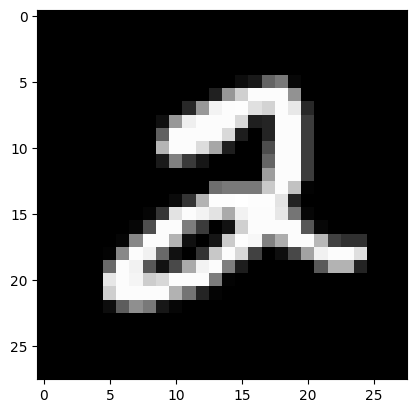

In [17]:
#showing the image at the position[] from datasets
image=x_train[5]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [18]:
#predicting the class of the image
image=image.reshape(1, image.shape[0],image.shape[1],image.shape[2])
predict_model = model.predict([image])
print("Predicted class :{}",format(np.argmax(predict_model)))  #argmax- it selects the class with max probability

1/1 [==============================] - 0s 82ms/step
Predicted class :{} 2
